In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Load dataset
dataset = pd.read_csv('Mall_Customers.csv')
# Display dataset
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
# Select features
X = dataset.iloc[:, 3:5].values
# OPTICS Clustering
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=5, xi=0.05)
y_clustering = clustering.fit_predict(X)
# Get cluster labels
y_clustering

array([-1,  5,  8,  5, -1,  5,  8, -1,  8,  5,  8, -1,  8,  5,  8,  5,  0,
        5,  0, -1,  0,  5,  8,  5,  8, -1,  0, -1,  0, -1,  8,  5,  8, -1,
        8, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  2,  2, -1,  2, -1,  2,  2, -1, -1,  2,
       -1, -1,  2, -1,  3, -1,  4,  3,  4,  4, -1,  3,  3,  4,  3,  4,  3,
       -1, -1, -1,  4,  3,  3,  4,  3,  3, -1,  4,  3,  3,  3,  4, -1, -1,
       -1, -1, -1, -1, 10, -1,  9, -1, 10, -1,  9,  6,  9, -1,  9,  6, 10,
        6,  9,  6,  9,  6, 10, -1, 10, -1, 10, -1,  9, -1, 10, -1, 10, -1,
        9, -1, 10,  6,  9,  6,  9, -1,  9,  6, 10,  7, -1,  7, 10,  7, -1,
        7, -1,  7, 10,  7, 10,  7, -1,  7, -1, -1, -1,  7, -1, -1, -1,  7,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [3]:
supervised = dataset
supervised['Cluster_group'] = y_clustering
# Display dataset with clusters
supervised
# Save to CSV
supervised.to_csv("cluster_optics.csv", index=False)
# Get attributes
dir(clustering)
# Display cluster labels
y_clustering
# Get column names
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

/Users/harikrishnan/Documents/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


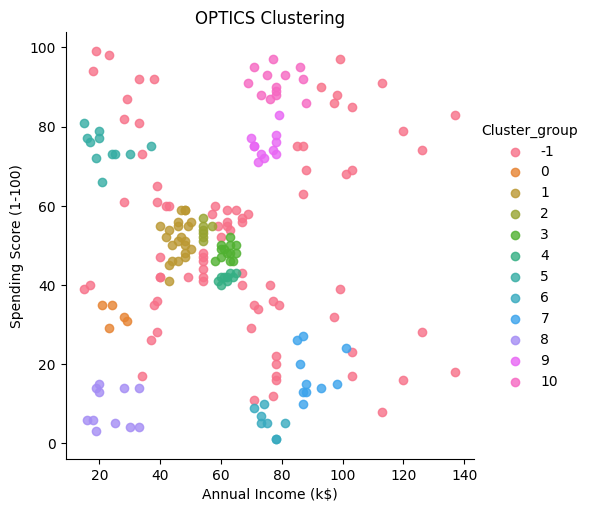


Number of clusters: 11
Number of noise points: 80

Note: OPTICS does not provide cluster centers.
Cluster label -1 represents noise/outlier points.


In [4]:
# Visualize clusters using seaborn
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], 
                   hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)

plt.title('OPTICS Clustering')
plt.show()

# Print clustering statistics
n_clusters = len(set(y_clustering)) - (1 if -1 in y_clustering else 0)
n_noise = list(y_clustering).count(-1)
print(f"\nNumber of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Note: OPTICS doesn't have cluster_centers_ attribute
print("\nNote: OPTICS does not provide cluster centers.")
print("Cluster label -1 represents noise/outlier points.")